#Chapter 3: Image Processing
In this chapter, we review standard image processing operators that map pixel values from
one image to another.

## Section 3.1: Point operators
We begin this chapter with the simplest kind of image transforms, namely those that manipulate each pixel independently of its neighbors; Such transforms are often called point operators or point processes. Examples of such operators include brightness and contrast adjustments as well as color correction and transformations. In the image processing literature, such operations are also known as point processes

### SubSection 3.1.1: Pixel transforms
A general image processing operator is a function that takes one or more input images and produces an output image. In the continuous domain, this can be denoted as:


$$g(x) = h(f(x))$$ or $$g(x) = h(f(x),....., f_n(x))$$


Two commonly used point processes are multiplication and addition with a constant:
$$g(x) = a(x)f(x) + b(x)$$
a is often called the gain and b is called the bias.

One highly used non-linear transform that is often applied to images before further processing is gamma correction, which is used to remove the non-linear mapping between input
radiance and quantized pixel values:
$$g(x)=[f(x)]^γ$$

### SubSection 3.1.3: Compositing and matting
In many photo editing and visual effects applications, it is often desirable to cut a foreground object out of one scene and put it on top of a different background. The process of extracting the object from the original image is often called matting , while the process of inserting it into another image (without visible artifacts) is called compositing

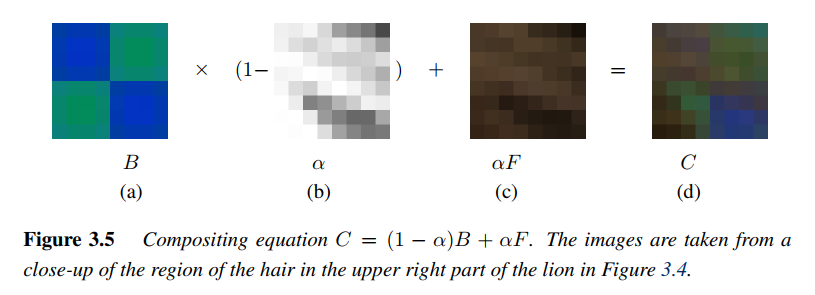



*   C is the composited (output) pixel
*   α is the opacity of pixel
*   B is the background pixel
*   F is the foreground pixel



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

%matplotlib inline

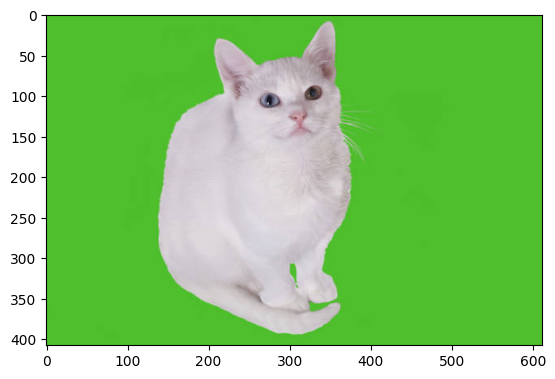

In [2]:
# Reading foreground image
front_img = cv2.imread("content\Images\cat.jpg", 1)
front_img = front_img[:,:,::-1]
plt.imshow(front_img)

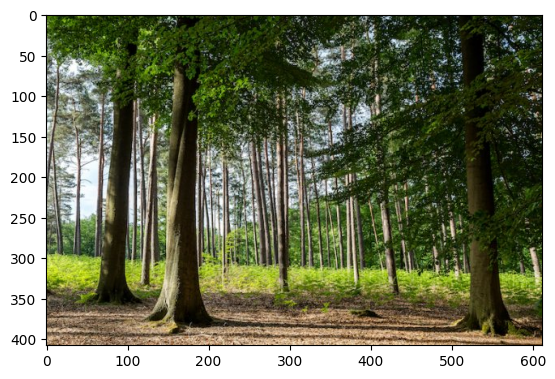

In [3]:
# Reading background image
back_img = cv2.imread("content/Images/forest.jpg", 1)
back_img = back_img[:,:,::-1]
plt.imshow(back_img)

(408, 612, 3)


Text(0.5, 1.0, 'matted image')

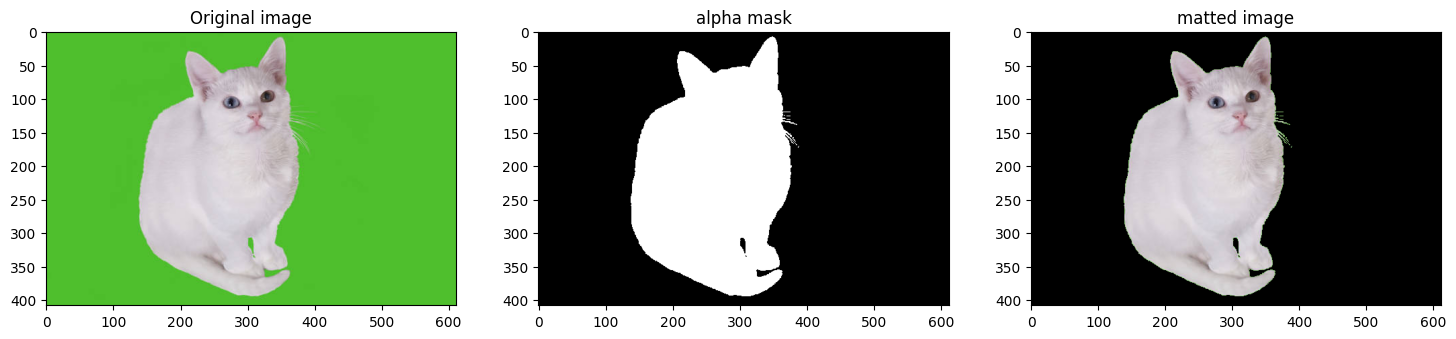

In [4]:
# Matting the foreground image
# creating alpha mask
alpha = np.ones(front_img.shape)
for i in range(front_img.shape[0]):
  for j in range(front_img.shape[1]):
    current_pixel = front_img[i][j]
    if(current_pixel[2] < 0.8*current_pixel[1] and current_pixel[0] < 0.64*current_pixel[1]): #green color
      alpha[i][j][0] = alpha[i][j][1] = alpha[i][j][2] = 0

# matting the image
print(alpha.shape)
front_img_matted = np.multiply(np.int0(alpha), front_img)

# Showing Images
plt.figure(figsize=(18, 5))
plt.subplot(131);plt.imshow(front_img);plt.title("Original image")
plt.subplot(132);plt.imshow(alpha);plt.title("alpha mask")
plt.subplot(133);plt.imshow(front_img_matted);plt.title("matted image")

Text(0.5, 1.0, 'composited image')

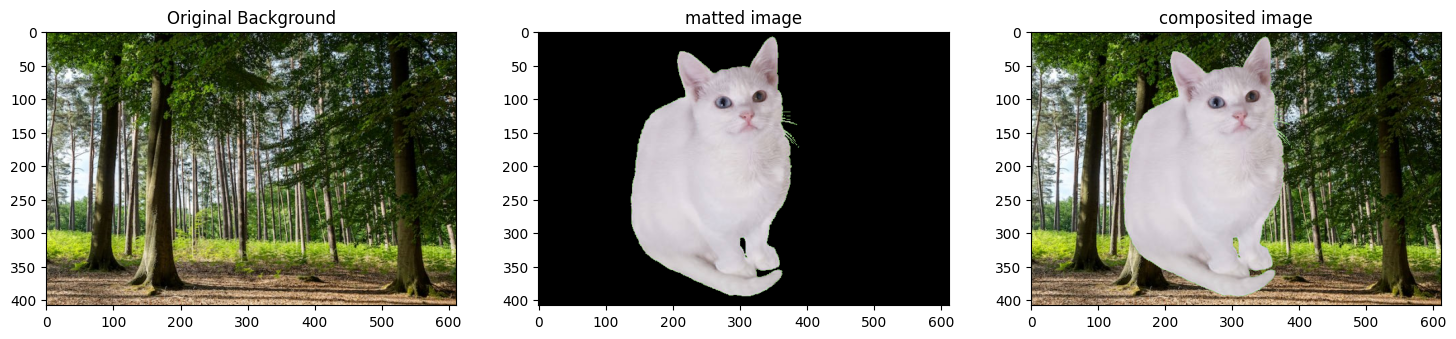

In [5]:
# Compositing foreground and background images
composited_img = np.add(front_img_matted , np.multiply(1-np.int0(alpha), back_img))

# Showing Images
plt.figure(figsize=(18, 5))
plt.subplot(131);plt.imshow(back_img);plt.title("Original Background")
plt.subplot(132);plt.imshow(front_img_matted);plt.title("matted image")
plt.subplot(133);plt.imshow(composited_img);plt.title("composited image")


## SubSection 3.1.4: Histogram equalization
While the brightness and gain controls described in Section 3.1.1 can improve the appearance of an image, how can we automatically determine their best values? One approach might be to look at the darkest and brightest pixel values in an image and map them to pure black and pure white. Another approach might be to find the average value in the image, push it towards middle gray, and expand the range so that it more closely fills the displayable values.

How can we visualize the set of lightness values in an image to test some of these heuristics? The answer is to plot the histogram of the individual color channels and luminance values From this distribution, we can compute relevant statistics such as the minimum, maximum, and average intensity values.

Would it not be better if we could simultaneously brighten some dark values and darken some light values, while still using the full extent of the available dynamic range? Can you think of a mapping that might do this?
One popular answer to this question is to perform **histogram equalization**

Think of the original histogram h(I) and cumulative distribution c(I)

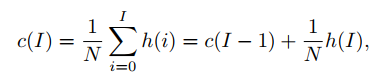

where N is the number of pixels in the image or students in the class. For any given grade or
intensity, we can look up its corresponding percentile c(I) and determine the final value that
the pixel should take. When working with eight-bit pixel values, the I and c axes are rescaled
from [0, 255]

For simplicity we will provide example on gray-scale Image.

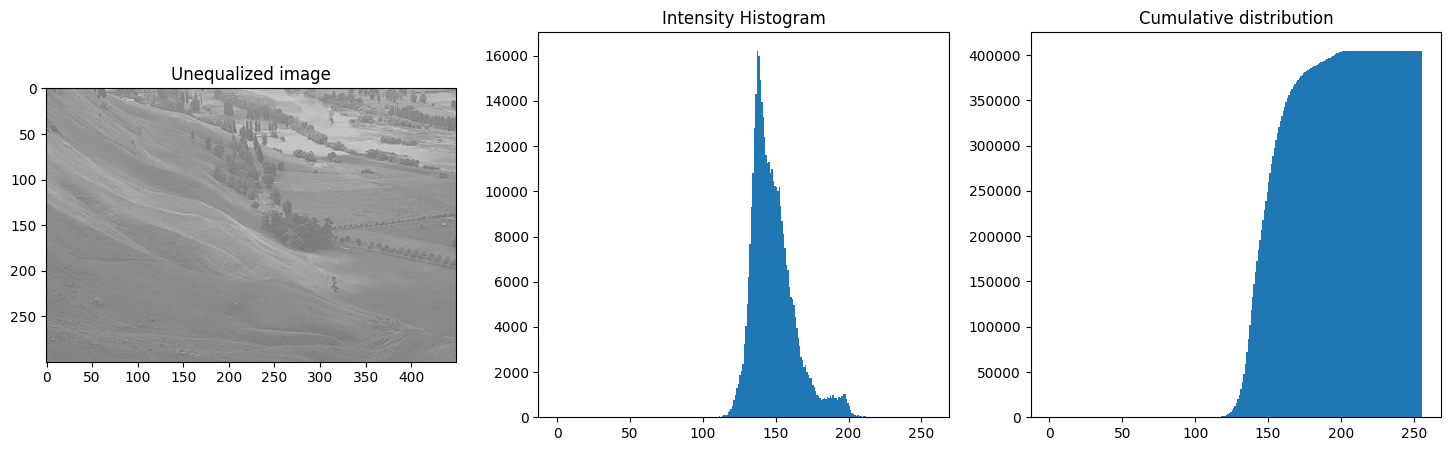

In [6]:
unequalized = cv2.imread("content/Images/Unequalized_Hawkes_Bay_NZ.jpg",1)
flattened_img = unequalized.flatten()
plt.figure(figsize=(18, 5))
plt.subplot(131);plt.imshow(unequalized, cmap="gray");plt.title("Unequalized image");
plt.subplot(132);plt.hist(flattened_img, bins = 256, range=[0,256]);plt.title("Intensity Histogram");
plt.subplot(133);plt.hist(flattened_img, bins = 256, range=[0,256], cumulative = True);plt.title("Cumulative distribution");
plt.show()

To get the equalized value of pixel:
$$Equalized(p) = (cdf(p)/totalnumberOFpixels) * 255$$

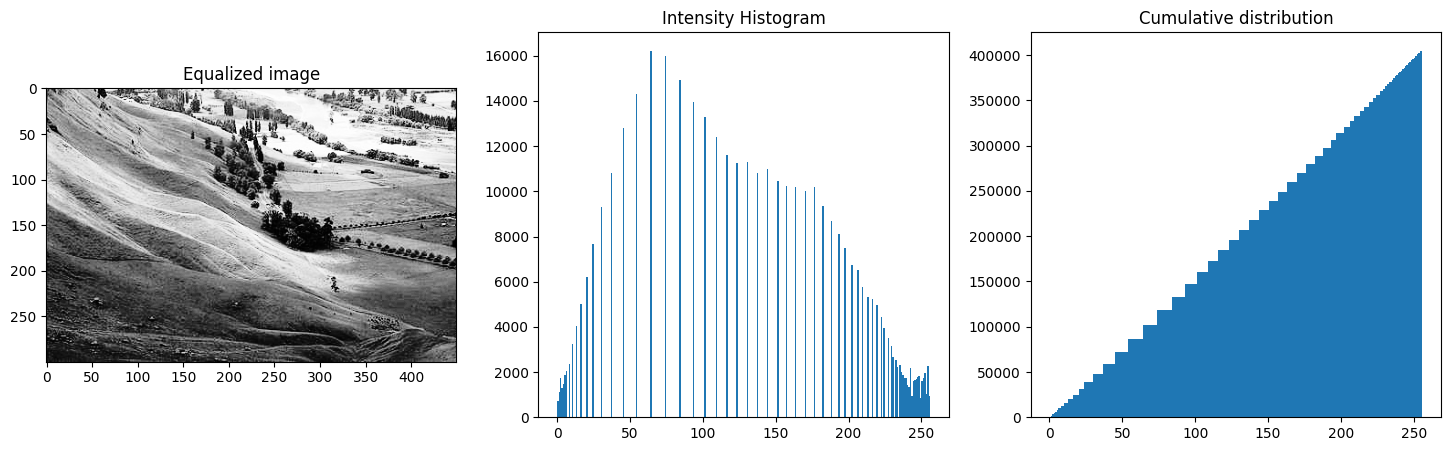

In [7]:
# Calculate the histogram of the image
hist, bins = np.histogram(flattened_img, 256, [0, 256])

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()
for i in range(flattened_img.size):
  p = flattened_img[i]
  flattened_img[i] = np.round((cdf[p])/(flattened_img.size) * 255)
equalized = flattened_img.reshape(unequalized.shape)
plt.figure(figsize=(18, 5))
plt.subplot(131);plt.imshow(equalized, cmap="gray");plt.title("Equalized image")
plt.subplot(132);plt.hist(flattened_img, bins = 256, range=[0,256]);plt.title("Intensity Histogram")
plt.subplot(133);plt.hist(flattened_img, bins = 256, range=[0,256], cumulative = True);plt.title("Cumulative distribution")
plt.show()

# Section 3.2: Image Filters: Linear Filter
Image filter is typically a local operation that modify image pixels based on some function of a local neighbourhood of each pixel. In this section, we look at linear filtering operators, which involve fixed weighted combinations of pixels (kernel, or mask) in small neighborhoods. Image filter is typically a local operation that modify image pixels based on some function of a local neighbourhood of each pixel

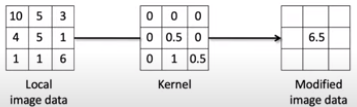

**Ex.1 Correlation**: Given a kernel of size (2k+1) x (2k+1):

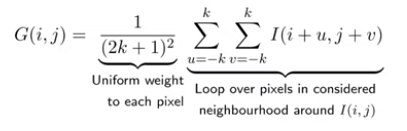

**Ex.2 Cross-Correlation**: Given a kernel of size (2k+1) x (2k+1):


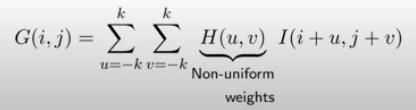

Cross-correlation is denoted by: G = H ⨂ I and can be viewed as "dot product" between local neighbourhood and kernel of each pixel.
Entries of Kernel or mask H(u, v) called filter coefficients.

**Ex.3 Moving Average Filter: Box Filter**: used in bluring and noise deduction:


In [8]:
def kernelCorr(I, H):
  n = H.shape[0]
  n = (n-1)//2
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      val = 0
      for k in range(-1*n,n+1):
        for l in range(-1*n,n+1):
          if i+k >= 0 and i+k < I.shape[0] and j+l >= 0 and j+l < I.shape[1]:
            val += np.round(H[n+k, n+l] * I[i+k, j+l])
      I[i,j] = np.abs(val)
    

In [9]:
def kernelConv(I, H):
  n = H.shape[0]
  n = (n-1)//2
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      val = 0
      for k in range(-1*n,n+1):
        for l in range(-1*n,n+1):
          if i+k >= 0 and i+k < I.shape[0] and j+l >= 0 and j+l < I.shape[1]:
            val += np.round(H[n-k, n-l] * I[i+k, j+l])
      I[i,j] = np.abs(val)

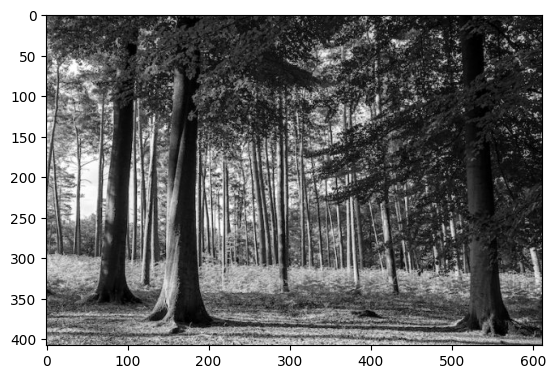

In [10]:
forest = cv2.imread("content/Images/forest.jpg",0)
forest_old = forest.copy()
plt.imshow(forest, cmap='gray')

In [11]:
forest_avg = forest.copy()
kernel = np.ones((3,3)) * 1/(9)
kernelCorr(forest_avg, kernel)

Text(0.5, 1.0, 'After')

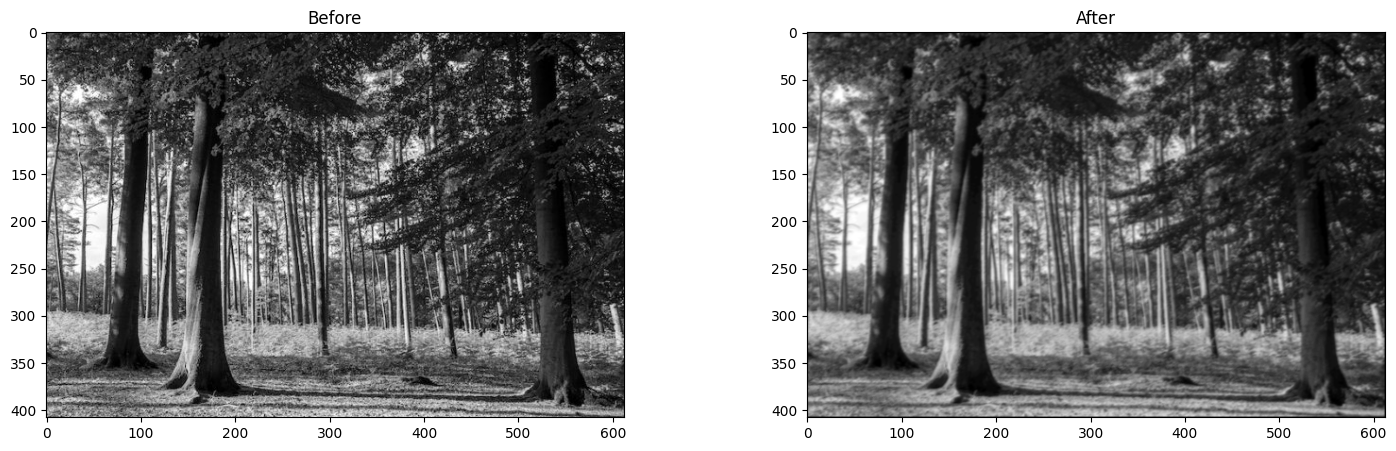

In [12]:
plt.figure(figsize=(18, 5))
plt.subplot(121);plt.imshow(forest_old, cmap='gray');plt.title("Before")
plt.subplot(122);plt.imshow(forest_avg, cmap='gray');plt.title("After")

**Ex.4 Gaussian Average Filter:**: What if we want nearest neighbouring pixels to have the most influence on the output:


Text(0.5, 1.0, 'After')

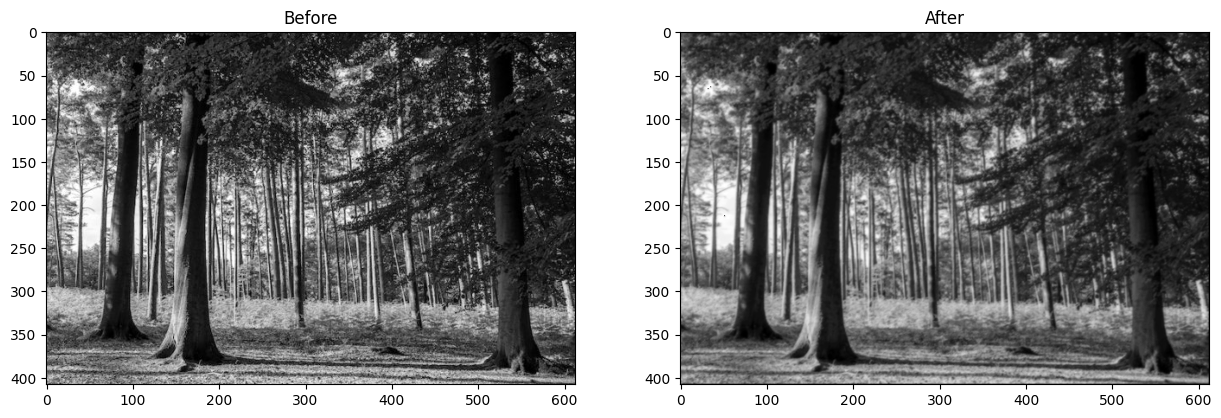

In [13]:
gauss_kernel = np.array([[1,2,1],
                         [2,4,2],
                         [1,2,1]]) / 16
gauss_forest = forest_old.copy()
kernelCorr(gauss_forest, gauss_kernel)
plt.figure(figsize=(15, 5))
plt.subplot(121);plt.imshow(forest_old, cmap='gray');plt.title("Before")
plt.subplot(122);plt.imshow(gauss_forest, cmap='gray');plt.title("After")

## SubSection 3.2.1: seperable filtering
Seperable filtering is a technique used in image processing to apply a filter to an image in a more efficient way. 

In traditional filtering, a filter kernel is convolved with each pixel in the image. This requires multiple multiplications and additions for each pixel, resulting in a high computational cost. 

Seperable filtering, on the other hand, takes advantage of the fact that some filters can be decomposed into two 1D filters. Instead of convolving the entire 2D filter kernel with each pixel, the image is convolved first with a 1D filter along the rows, and then with a 1D filter along the columns. 

This approach significantly reduces the number of computations required, as the 1D filters can be applied separately. The resulting filtered image is the same as if the original 2D filter had been applied. 

Seperable filtering is particularly useful for large filter kernels, as it reduces the computational complexity from O(n^2) to O(n), where n is the size of the filter kernel. This makes it much faster and more efficient for real-time applications or when working with high-resolution images.

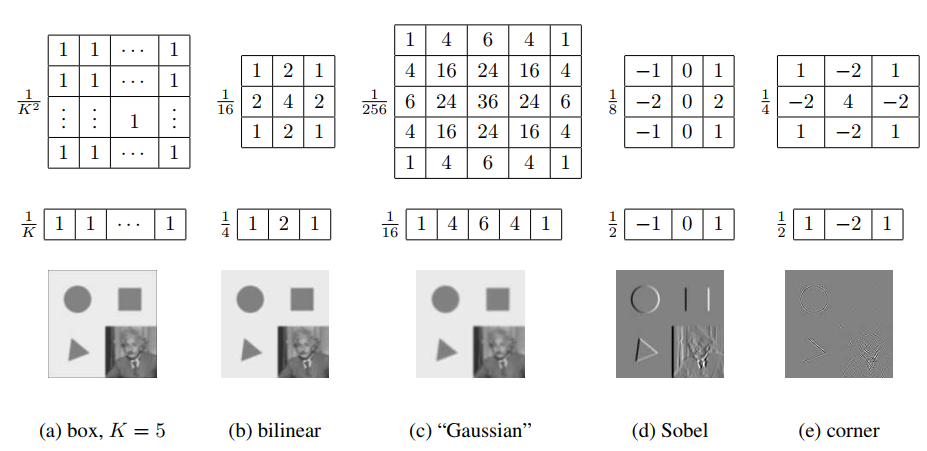

In [15]:
def kernelCorr_sep(I, H):
  n = H.shape[0]
  n = (n-1)//2
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      val = 0
      for k in range(-1*n,n+1):
        if k+j >= 0 and k+j < I.shape[1]:
          val += np.round(H[n+k] * I[i, j+k])
      I[i,j] = np.abs(val)
  for j in range(I.shape[1]):
    for i in range(I.shape[0]):
      val = 0
      for k in range(-1*n,n+1):
        if i+k >= 0 and i+k < I.shape[0]:
          val += np.round(H[n+k] * I[i+k, j])
      I[i,j] = np.abs(val)

In [16]:
forest_avg_sep = forest.copy()
kernel = np.ones(3) * 1/(3)
kernelCorr_sep(forest_avg_sep, kernel)

Text(0.5, 1.0, 'After')

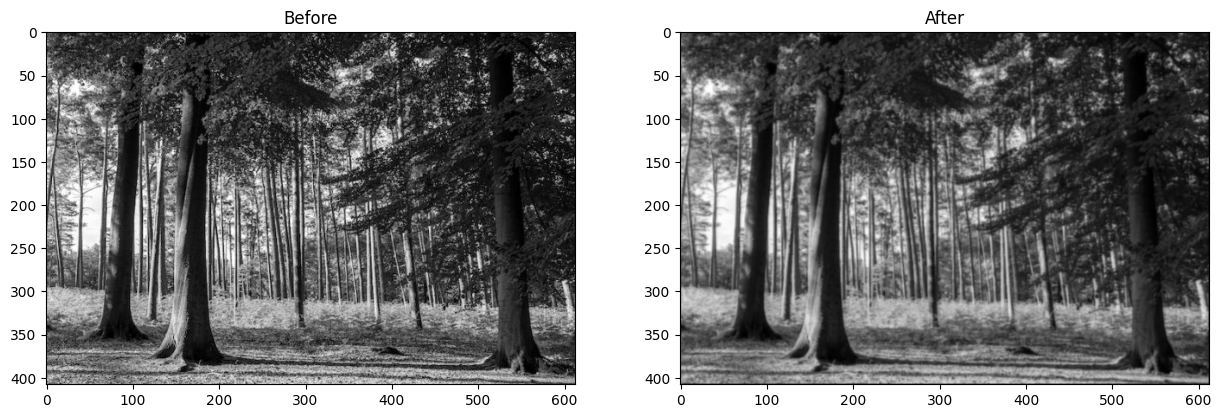

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(121);plt.imshow(forest_old, cmap='gray');plt.title("Before")
plt.subplot(122);plt.imshow(forest_avg_sep, cmap='gray');plt.title("After")

As you can see the seperable filtering correlation cell took around 27 seconds to finish executing, while the full kernel correlation took 40 seconds.

## Section 3.4: Fourier Transform (Image in frequency domain)
we will now try to represent images in a very Different way, we will look at it as a two dimentional signal composed of different frequencies.

The Fourier Transform is a mathematical technique that allows us to represent an image in the frequency domain. It decomposes an image into its constituent frequencies, revealing the different spatial frequencies present in the image.

The Fourier Transform of an image is defined as follows:

$$ F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-i2\pi(\frac{ux}{M} + \frac{vy}{N})} $$

where:
- $F(u, v)$ is the Fourier Transform of the image at frequency $(u, v)$
- $f(x, y)$ is the pixel value of the image at position $(x, y)$
- $M$ and $N$ are the dimensions of the image

The Fourier Transform of an image provides us with information about the spatial frequencies present in the image. The magnitude of the Fourier Transform represents the amplitude of each frequency component, while the phase represents the phase shift of each frequency component.

By analyzing the Fourier Transform of an image, we can perform various operations in the frequency domain, such as filtering, compression, and image enhancement.

To visualize the Fourier Transform of an image, we can use the magnitude spectrum, which is obtained by taking the absolute value of the Fourier Transform:

$$ A(u, v) = |F(u, v)| $$

The magnitude spectrum provides us with a visual representation of the frequency content of the image, where brighter regions correspond to higher amplitudes (i.e., stronger frequencies).

In summary, the Fourier Transform allows us to analyze and manipulate images in the frequency domain, providing insights into the spatial frequencies present in the image and enabling various image processing operations.


c:\Users\moham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part


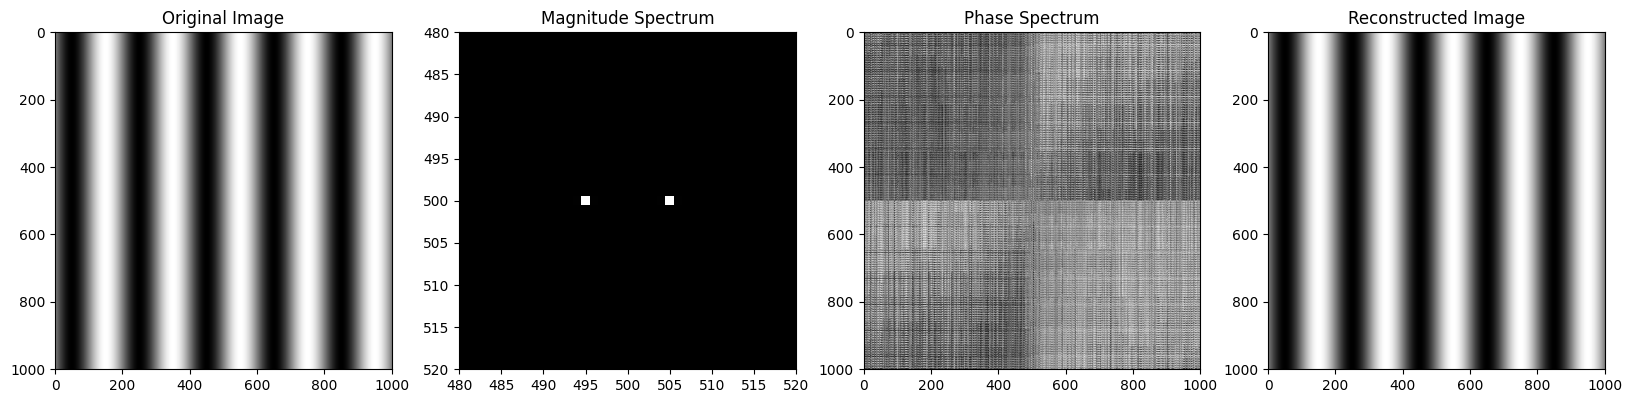

In [18]:
from scipy.fft import fft2, fftshift, ifft2, ifftshift

# Creating grating image
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

# Read the image
freq_img = grating

# Perform Fourier Transform
fft_image = fftshift(fft2(freq_img))

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(fft_image)

# Calculate the phase spectrum
phase_spectrum = np.angle(fft_image)

# Display the original image, magnitude spectrum and phase spectrum
plt.figure(figsize=(20, 10))
plt.subplot(141)
plt.imshow(freq_img, cmap='gray')
plt.title("Original Image")
plt.axis('on')

plt.subplot(142)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xlim([480, 520]) #to zoom in
plt.ylim([520, 480]) #to zoom in
plt.title("Magnitude Spectrum")
plt.axis('on')

plt.subplot(143)
plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum")
plt.axis('on')

# Reconstructing original image
reconstructed_img = np.double(ifft2(ifftshift(fft_image)))

# Display reconstructed image
plt.subplot(144)
plt.imshow(reconstructed_img, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('on')
plt.show()


The code provided in the previous cell utilizes the Fast Fourier Transform (FFT) instead of the plain Fourier Transform. The FFT is a more efficient algorithm with a complexity of O(nlog(n)), compared to the O(n^2) complexity of the plain Fourier Transform.

The Fast Fourier Transform (FFT) is widely used in signal processing and image processing applications. It allows us to efficiently compute the Discrete Fourier Transform (DFT) of a sequence or an image. The DFT is a mathematical transformation that decomposes a signal or an image into its constituent frequencies.

By using the FFT, we can analyze the frequency content of an image and perform various operations in the frequency domain, such as filtering, compression, and image enhancement. The FFT algorithm exploits the symmetry and periodicity properties of the Fourier Transform to reduce the computational complexity, making it suitable for real-time applications.

In summary, the use of the Fast Fourier Transform (FFT) in the previous cell provides a more efficient way to analyze and manipulate the frequency content of the image, enabling advanced image processing techniques with improved performance.


The two dots in the Magnitude spectrum simply resemples the the magnitude of the sinsoidals at those specific frequencies as shown in the next figure:

(-0.5, 669.5, 275.5, -0.5)

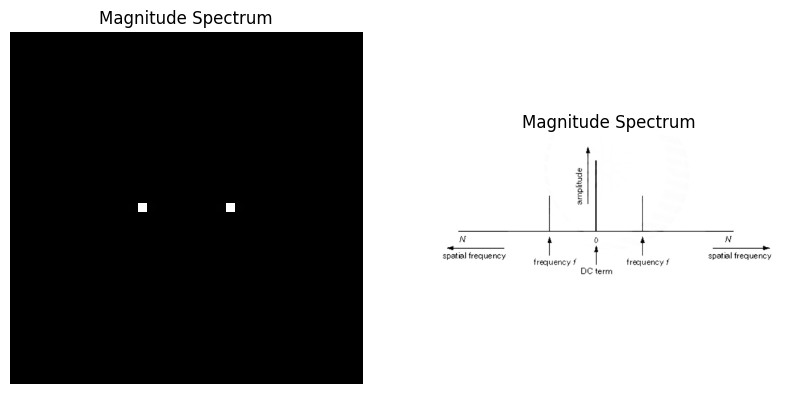

In [19]:
fourier_mag = cv2.imread("content\Images\magnitude_spectrum.jpg",0)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xlim([480, 520]) #to zoom in
plt.ylim([520, 480]) #to zoom in
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.subplot(122)
plt.imshow(fourier_mag, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

The 2D Fourier Transform is a powerful tool in image processing that allows us to analyze and manipulate images in the frequency domain. Here are some reasons why the 2D Fourier Transform is useful for image processing:

1. **Frequency Analysis**: The Fourier Transform breaks down an image into its frequency components, aiding in pattern detection and feature identification.

2. **Filtering**: Manipulating an image's frequency components allows for noise reduction and feature enhancement, improving image quality.

3. **Compression**: The Fourier Transform can compress images by discarding less significant frequency components, reducing data size while preserving key visual information.

4. **Image Enhancement**: By selectively modifying frequency components, the Fourier Transform can enhance image features like edges or textures and adjust brightness and contrast.

5. **Image Reconstruction**: The inverse Fourier Transform can restore an image from its frequency components, useful in image restoration to remove artifacts or recover missing information.

6. **Convolution to Multiplication**: The Fourier Transform converts convolution operations in the spatial domain into simple multiplication operations in the frequency domain. This is known as the Convolution Theorem. In image processing, convolution is often used for image filtering, such as blurring, sharpening, and edge detection. By transforming the image and the filter into the frequency domain, the convolution operation (which can be computationally expensive) can be replaced with a much simpler multiplication operation. After the multiplication, the inverse Fourier Transform is used to bring the result back into the spatial domain.

Overall, the 2D Fourier Transform provides a powerful framework for analyzing, filtering, compressing, enhancing, and reconstructing images. It allows us to understand the frequency content of an image and leverage this information to perform various image processing operations.

**Low-pass and High-pass Filters:**
Low-pass and high-pass filters are common applications of Fourier Transform in image processing:

- **Low-pass filters** allow low-frequency components to pass through and attenuate high-frequency components. In the context of images, low frequencies correspond to slow changes in intensity, such as the overall brightness and contrast of the image. Thus, applying a low-pass filter in the frequency domain has the effect of blurring the image in the spatial domain, Gaussian blur filter is an example of low-pass filter.

- **High-pass filters** do the opposite: they allow high-frequency components to pass through and attenuate low-frequency components. High frequencies in an image correspond to rapid changes in intensity, such as edges and fine details. Thus, applying a high-pass filter in the frequency domain has the effect of sharpening the image in the spatial domain, as it enhances edges and other high-frequency components.

By manipulating the frequency components of an image using the Fourier Transform, we can perform a wide range of image processing tasks more efficiently and effectively.


I will now test how utilizing the convolution to multiplication property and frequency filters will affect the filtering process.

c:\Users\moham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 1.0, 'gaussian blur')

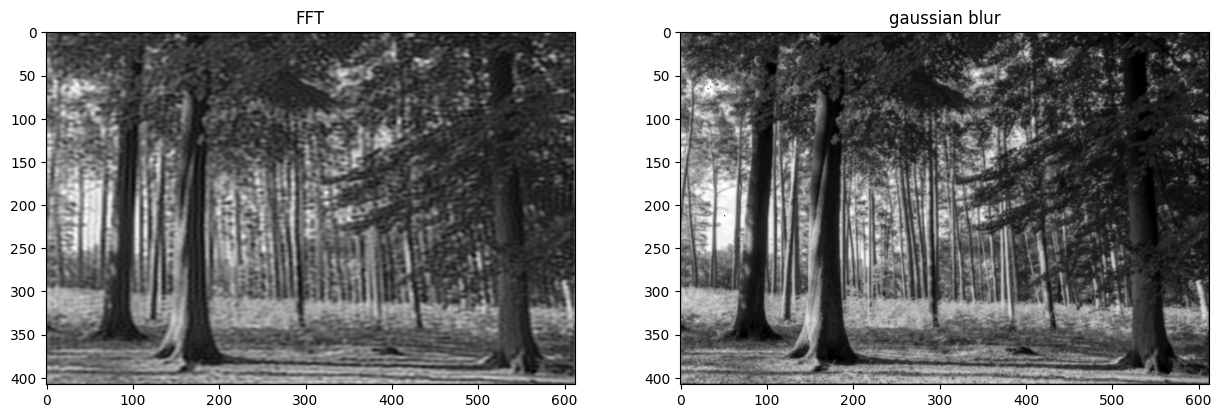

In [20]:
# Create a circular low-pass filter to resemble the edge filter
def circular_lowPass_filter(img, r):
    # Transforming image to frequency domain
    img_fft = fftshift(fft2(img))
    rows, cols = img.shape
    crows, ccols = rows//2, cols//2

    mask = np.zeros((rows, cols))

    center = [crows, ccols]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
    mask[mask_area] = 1

    img_fft_filter = np.multiply(mask, img_fft)
    img_fft_filter_inv = np.double(ifft2(ifftshift(img_fft_filter)))
    return img_fft_filter_inv

plt.figure(figsize=(15, 5))
plt.subplot(121);plt.imshow(circular_lowPass_filter(forest, 80), cmap='gray');plt.title("FFT")
plt.subplot(122);plt.imshow(gauss_forest, cmap='gray');plt.title("gaussian blur")

c:\Users\moham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 1.0, 'FFT Edge')

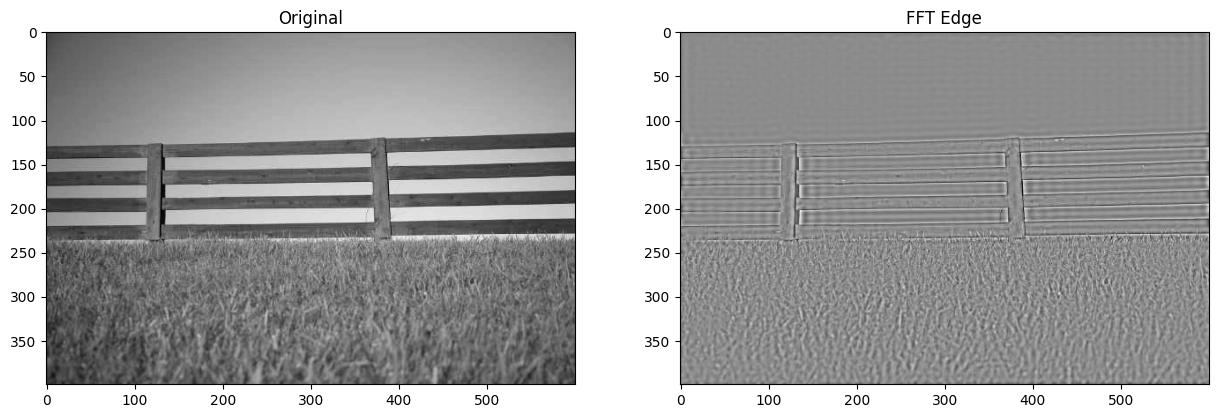

In [21]:
# Create a circular high-pass filter to resemble the edge filter
def circular_highPass_filter(img, r):
    # Transforming image to frequency domain
    img_fft = fftshift(fft2(img))
    rows, cols = img.shape
    crows, ccols = rows//2, cols//2

    mask = np.ones((rows, cols))

    center = [crows, ccols]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
    mask[mask_area] = 0

    img_fft_edge = np.multiply(mask, img_fft)
    img_fft_edge_inv = np.double(ifft2(ifftshift(img_fft_edge)))
    return img_fft_edge_inv

plt.figure(figsize=(15, 5))
plt.subplot(121);plt.imshow(fence, cmap='gray');plt.title("Original")
plt.subplot(122);plt.imshow(circular_highPass_filter(fence, 45), cmap='gray');plt.title("FFT Edge")


It is incredible how fast these filters got executed 

## Section 3.5: Pyramids and Wavelets (Sampling and Aliasing)
### Subsampling (down sampling):
In this section, we will discuss subsampling in the context of image processing. We'll look at how to reduce the resolution of an image.

Subsampling is a technique used in image processing to reduce the resolution of an image. It involves discarding some of the pixels in the image, resulting in a lower-resolution version of the original image.

The process of subsampling typically involves selecting every nth pixel in both the horizontal and vertical directions. For example, if we choose a subsampling factor of 2, we would keep every other pixel in each row and column, effectively reducing the image size by half.

In [22]:
# creating code for subsampling function
def subSampleimg(img, factor):
    return img[::factor, ::factor]

Text(0.5, 1.0, 'Subsampled image (112, 84)')

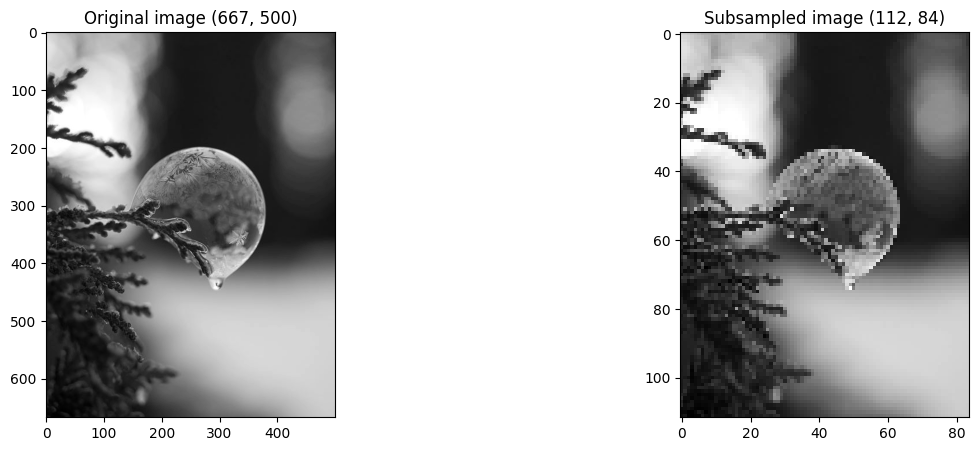

In [23]:
water_drop = cv2.imread("content\Images\water_drop.jpg",0)

# subsampling the image
water_drop_subsampled = subSampleimg(water_drop, 6)

# displaying the images
plt.figure(figsize=(15, 5))
plt.subplot(121);plt.imshow(water_drop, cmap='gray');plt.title(f"Original image {water_drop.shape}")
plt.subplot(122);plt.imshow(water_drop_subsampled, cmap='gray');plt.title(f"Subsampled image {water_drop_subsampled.shape}")

Subsampling can be useful in various scenarios. It can help reduce the computational complexity of image processing algorithms by working with smaller images. It can also be used for downsampling images to reduce storage space or transmission bandwidth.

However, subsampling also comes with some drawbacks. One major drawback is the loss of detail and information in the image. By discarding pixels, we sacrifice some level of image quality and fine details. This loss of information can be particularly noticeable in images with high-frequency content, such as sharp edges or fine textures.

To mitigate the loss of information during subsampling, it is common to apply a low-pass filter before subsampling. The low-pass filter helps to reduce high-frequency components in the image, reducing the chance of aliasing artifacts. Aliasing occurs when high-frequency information is incorrectly represented in the subsampled image, leading to distortions and artifacts and this happens when the sampling frequence is less than twice the maximum frequency of the signal.

In [24]:
def subSampleimg_lowPass(img, factor):
    mod_img = circular_lowPass_filter(img, 100)
    return mod_img[::factor, ::factor]

c:\Users\moham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 1.0, 'Subsampled image (112, 84)')

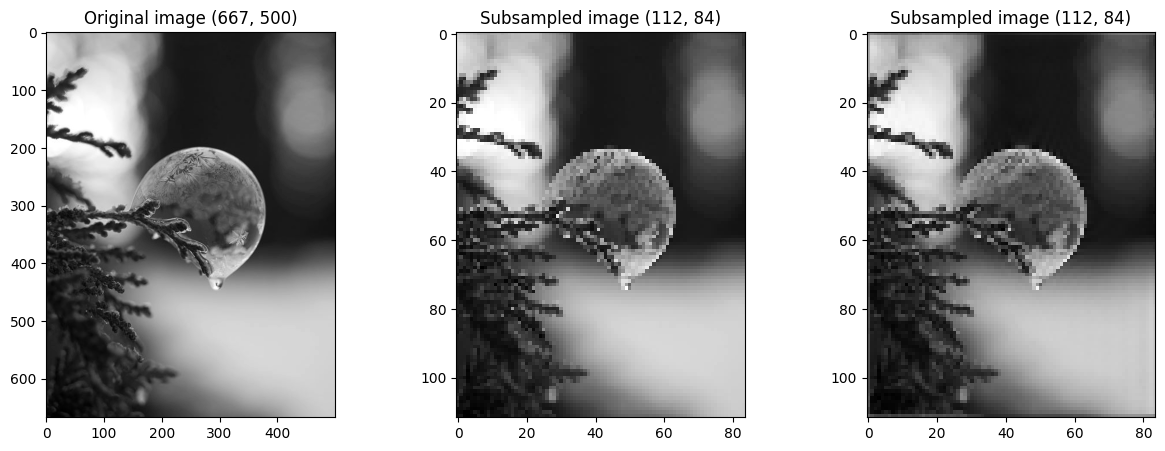

In [25]:
# Subsampling image with low-pass pre-filtering
water_drop_subsampled_lowPass = subSampleimg_lowPass(water_drop, 6)

# Display images
plt.figure(figsize=(15, 5))
plt.subplot(131);plt.imshow(water_drop, cmap='gray');plt.title(f"Original image {water_drop.shape}")
plt.subplot(132);plt.imshow(water_drop_subsampled, cmap='gray');plt.title(f"Subsampled image {water_drop_subsampled.shape}") 
plt.subplot(133);plt.imshow(water_drop_subsampled_lowPass, cmap='gray');plt.title(f"Subsampled image with prefiltering {water_drop_subsampled_lowPass.shape}")

In summary, subsampling is a technique used in image processing to reduce the resolution of an image. It involves discarding pixels and can be useful for reducing computational complexity or downsampling images. However, it also comes with the drawback of loss of detail and information, which can be mitigated by applying a low-pass filter before subsampling.

### Upsampling:
Upsampling is a technique used in image processing to increase the resolution of an image. It involves adding new pixels to the image, resulting in a higher-resolution version of the original image.

The process of upsampling typically involves inserting new pixels between the existing pixels in both the horizontal and vertical directions. This can be done using various interpolation methods, such as nearest neighbor, bilinear, or bicubic interpolation.

In [26]:
def nearest_neighbour_upsampling(img, factor):
    rows, cols= img.shape
    new_rows, new_cols = rows*factor, cols*factor
    new_img = np.zeros((new_rows, new_cols))
    for i in range(rows):
        for j in range(cols):
            for k in range(factor):
                for l in range(factor):
                    new_img[i*factor+k, j*factor+l] = img[i, j]
    return new_img

Text(0.5, 1.0, 'Up sampled image (672, 504)')

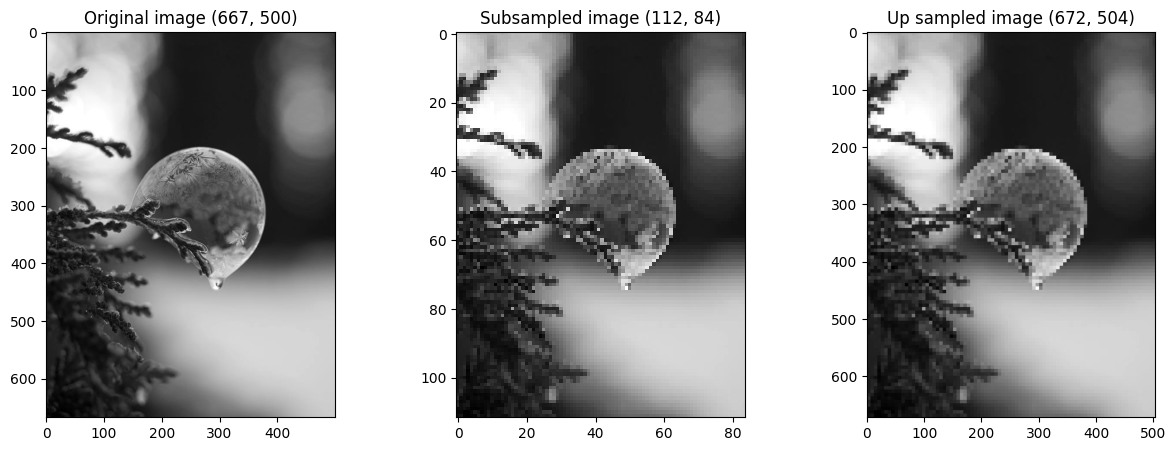

In [27]:
# Up sampling image
NN_upsampled_water_drop = nearest_neighbour_upsampling(water_drop_subsampled, 6)

# Display images
plt.figure(figsize=(15, 5))
plt.subplot(131);plt.imshow(water_drop, cmap='gray');plt.title(f"Original image {water_drop.shape}")
plt.subplot(132);plt.imshow(water_drop_subsampled, cmap='gray');plt.title(f"Subsampled image {water_drop_subsampled.shape}")
plt.subplot(133);plt.imshow(NN_upsampled_water_drop, cmap='gray');plt.title(f"Up sampled image {NN_upsampled_water_drop.shape}")

In [36]:
def bilinear_upsampling(image, scale_factor):
    height, width = image.shape
    new_height = height * scale_factor
    new_width = width * scale_factor

    # Create a new image with the new dimensions
    upsampled_image = np.zeros((new_height, new_width))

    # Populate the new image with interpolated pixel values
    for i in range(new_height):
        for j in range(new_width):
            # Map the pixel position in the new image to the corresponding position in the original image
            x = i / scale_factor
            y = j / scale_factor

            # Get the coordinates of the four nearest pixels in the original image
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1+1, height-1), min(y1+1, width-1)

            # Calculate the interpolation weights
            a = x - x1
            b = y - y1

            # Perform bilinear interpolation
            upsampled_image[i, j] = (
                (1 - a) * (1 - b) * image[x1, y1] +
                a * (1 - b) * image[x2, y1] +
                (1 - a) * b * image[x1, y2] +
                a * b * image[x2, y2]
            )

    return upsampled_image

Text(0.5, 1.0, 'Up sampled image (672, 504)')

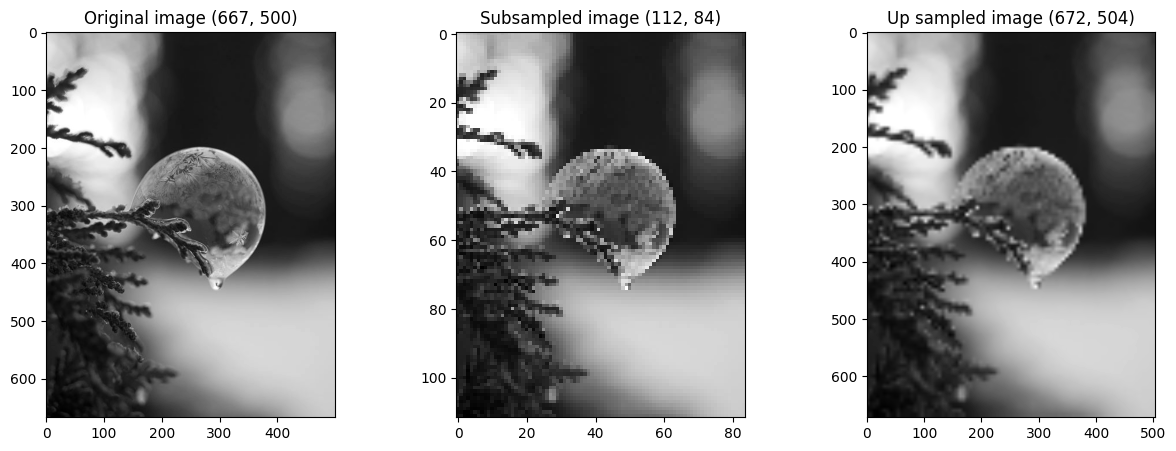

In [37]:
# Upsampling image bilinear
bilinear_upsampled_water_drop = bilinear_upsampling(water_drop_subsampled, 6)

# Display images
plt.figure(figsize=(15, 5))
plt.subplot(131);plt.imshow(water_drop, cmap='gray');plt.title(f"Original image {water_drop.shape}")
plt.subplot(132);plt.imshow(water_drop_subsampled, cmap='gray');plt.title(f"Subsampled image {water_drop_subsampled.shape}")
plt.subplot(133);plt.imshow(bilinear_upsampled_water_drop, cmap='gray');plt.title(f"Up sampled image {bilinear_upsampled_water_drop.shape}")

In [38]:
from scipy import interpolate

def bicubic_interpolation(image, scale_factor):
    height, width = image.shape
    new_height = height * scale_factor
    new_width = width * scale_factor

    # Create a grid of points in the original image
    x = np.arange(width)
    y = np.arange(height)
    
    # Create a bicubic interpolation function
    bicubic_interp = interpolate.interp2d(x, y, image, kind='cubic')

    # Create a new grid of points in the upsampled image
    new_x = np.linspace(0, width, new_width)
    new_y = np.linspace(0, height, new_height)

    # Apply the bicubic interpolation function to the new grid
    upsampled_image = bicubic_interp(new_x, new_y)

    return upsampled_image

Text(0.5, 1.0, 'Up sampled image (672, 504)')

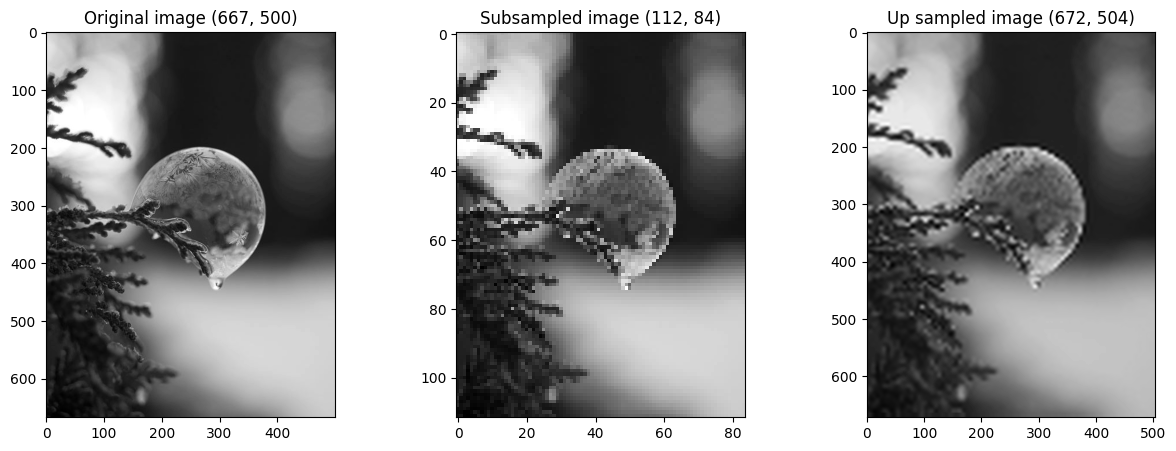

In [39]:
# Upsampling image bicubic
bicubic_upsampled_water_drop = bicubic_interpolation(water_drop_subsampled, 6)

# Display images
plt.figure(figsize=(15, 5))
plt.subplot(131);plt.imshow(water_drop, cmap='gray');plt.title(f"Original image {water_drop.shape}")
plt.subplot(132);plt.imshow(water_drop_subsampled, cmap='gray');plt.title(f"Subsampled image {water_drop_subsampled.shape}")
plt.subplot(133);plt.imshow(bicubic_upsampled_water_drop, cmap='gray');plt.title(f"Up sampled image {bicubic_upsampled_water_drop.shape}")

Text(0.5, 1.0, 'Upsampled (bicubic) image (672, 504)')

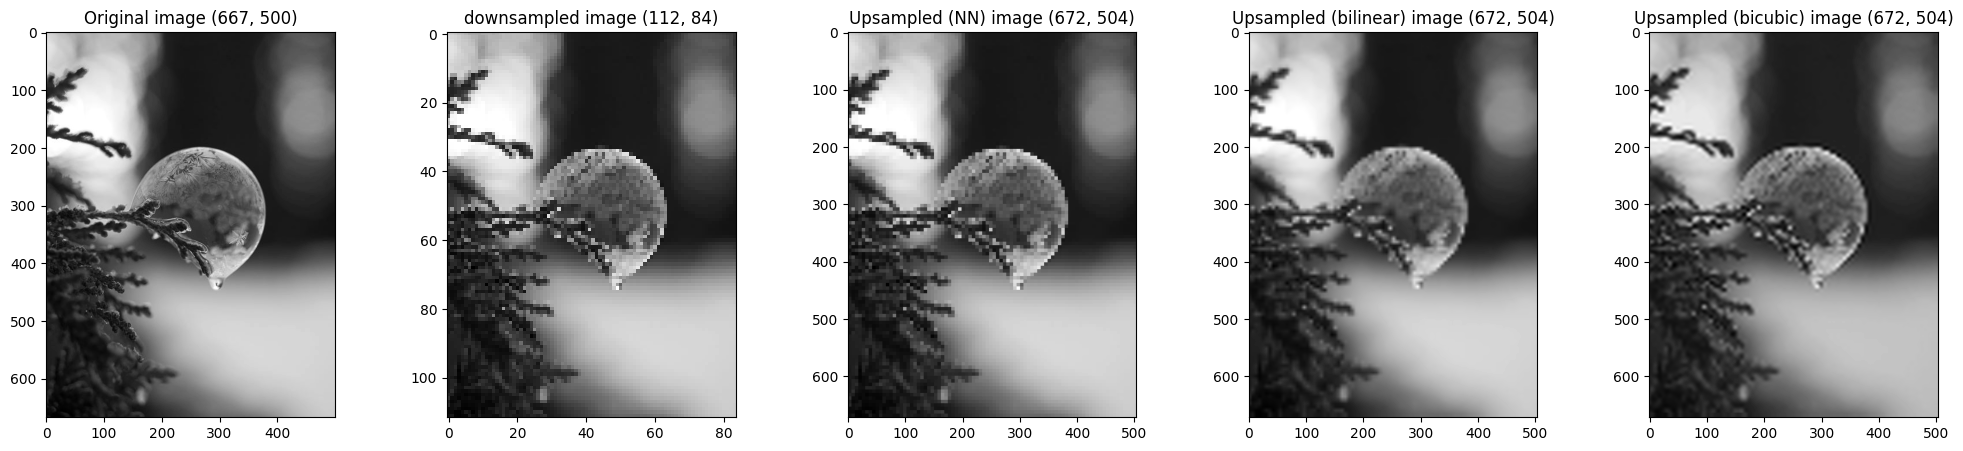

In [43]:
# Display all images
plt.figure(figsize=(25, 5))
plt.subplot(151);plt.imshow(water_drop, cmap='gray');plt.title(f"Original image {water_drop.shape}")
plt.subplot(152);plt.imshow(water_drop_subsampled, cmap='gray');plt.title(f"downsampled image {water_drop_subsampled.shape}")
plt.subplot(153);plt.imshow(NN_upsampled_water_drop, cmap='gray');plt.title(f"Upsampled (NN) image {NN_upsampled_water_drop.shape}")
plt.subplot(154);plt.imshow(bilinear_upsampled_water_drop, cmap='gray');plt.title(f"Upsampled (bilinear) image {bilinear_upsampled_water_drop.shape}")
plt.subplot(155);plt.imshow(bicubic_upsampled_water_drop, cmap='gray');plt.title(f"Upsampled (bicubic) image {bicubic_upsampled_water_drop.shape}")

Upsampling can be useful in several scenarios. It can help enhance the visual quality of an image by increasing the level of detail and sharpness. It can also be used to prepare images for further processing or analysis, where a higher resolution is required.

However, it's important to note that upsampling does not add new information to the image. The new pixels are generated based on the existing pixel values and the interpolation method used. Therefore, upsampling may not always result in a significant improvement in image quality, especially if the original image has low resolution or lacks fine details.

In summary, upsampling is a technique used in image processing to increase the resolution of an image. It can enhance the visual quality and prepare images for further processing. However, it should be used with caution and in conjunction with appropriate filtering techniques to achieve the desired results.